# Sorting Algorithms

Sorting is a fundamental operation in many computing system and there are myriad sorting algorithms that vary both in how they work and how they perform.

Let's use use Fiddle to compare several sorting algorthims, implemented in [sorting/sort.cpp](sorting/sort.cpp).

To start, we'll compile `sort.cpp`:

In [1]:
from fiddle import *
from numpy import arange
import pandas as pd

configure_for_jupyter()
sort = build("sorting/sort.cpp", build_parameters=dict(OPTIMIZE="-O3"), verbose=True)[0]

['make', '-f', '/cse142L/fiddle/src/fiddle/resources/make/fiddle.make', 'OPTIMIZE=-O3', 'BUILD=.fiddle/builds/build/OPTIMIZE_-O3_sort', 'FIDDLE_INCLUDE=/cse142L/fiddle/src/fiddle/resources/include', 'FIDDLE_VPATH=sorting:.fiddle/builds/build/OPTIMIZE_-O3_sort', '.fiddle/builds/build/OPTIMIZE_-O3_sort/sort.so']
make: '.fiddle/builds/build/OPTIMIZE_-O3_sort/sort.so' is up to date.



## Bubble Sort

Then we can get started with [bubble sort](https://en.wikipedia.org/wiki/Bubble_sort):

In [2]:
sort.source("bubble_sort")

uint64_t* bubble_sort(uint64_t size)
{
	uint64_t * list = random_array(size);
	start_measurement();
	uint64_t temp;
	for(uint64_t i=0; i<size; i++)
	{
		for(uint64_t j=size-1; j>i; j--)
		{
			if(list[j]<list[j-1])
			{
				temp=list[j-1];
				list[j-1]=list[j];
				list[j]=temp;
			}
		}
	}
	end_measurement();
	CHECK(list);
	return NULL;
}

Bubble sort's complexity is $O(n^2)$, which we can verify by [plotting](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html) it's execution time as a function of $n$:

<AxesSubplot:xlabel='n', ylabel='exec. time (s)'>

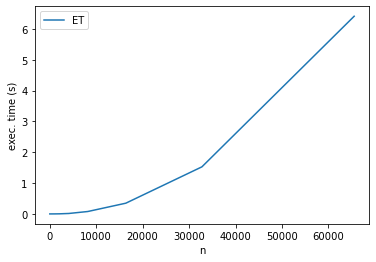

In [3]:
r = run(product([sort], ["bubble_sort"], map_product(size=2**arange(4, 17)))).as_df()
r.plot.line(x="size", y="ET", xlabel="n", ylabel="exec. time (s)")


## Insertion Sort

[Insertion Sort](https://en.wikipedia.org/wiki/Insertion_sort) is also $O(n^2)$.  Let's compare them!

In [4]:
sort.source("insertion_sort")

uint64_t* insertion_sort(uint64_t size)
{
	uint64_t * list = random_array(size);
	start_measurement();
	for(uint64_t j=1;j<size;j++)
	{
		uint64_t key=list[j];
		uint64_t i = j-1;
		while(list[i] > key)
		{
			list[i+1]=list[i];
			if (i == 0)
				break;
			i=i-1;
		}
		list[i+1]=key;

	}
	end_measurement();
	CHECK(list);
	return NULL;
}

In [5]:
r = run(product([sort], ["bubble_sort", "insertion_sort"], map_product(size=2**arange(4, 16)))).as_df()

This gives a nice table of values:

In [6]:
display(r)

,OPTIMIZE,function,size,ET
0,-O3,bubble_sort,16,0.000007
1,-O3,bubble_sort,32,0.000006
2,-O3,bubble_sort,64,0.000014
3,-O3,bubble_sort,128,0.000065
4,-O3,bubble_sort,256,0.000173
5,-O3,bubble_sort,512,0.000387
6,-O3,bubble_sort,1024,0.000908
7,-O3,bubble_sort,2048,0.002986
8,-O3,bubble_sort,4096,0.014512
9,-O3,bubble_sort,8192,0.075053


But it's not so easy to graph.  Panda's [pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) can fix that:

In [7]:
comparison = pd.pivot_table(r, values="ET", columns="function", index="size")
display(comparison)

function,bubble_sort,insertion_sort
size,,
16,0.000007,0.000007
32,0.000006,0.000005
64,0.000014,0.000008
128,0.000065,0.000005
256,0.000173,0.000016
512,0.000387,0.000042
1024,0.000908,0.000137
2048,0.002986,0.000532
4096,0.014512,0.002125


<AxesSubplot:xlabel='n', ylabel='exec. time (s)'>

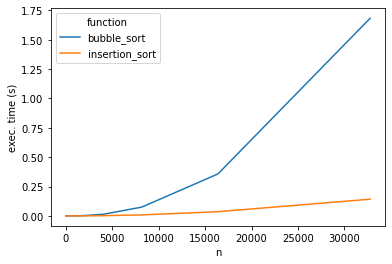

In [8]:
comparison.plot.line(xlabel="n", ylabel="exec. time (s)")

I guess that's why you're not supposed to use bubble sort!

## More Sorts

Let's drop bubble sort because it's terribly slow.

In [9]:
r = run(product([sort], ["insertion_sort", 
                         "merge_sort", 
                         "stl_sort", 
                         "quick_sort"
                        ], map_product(size=2**arange(4, 16)))).as_df()

<AxesSubplot:xlabel='n', ylabel='exec. time (s)'>

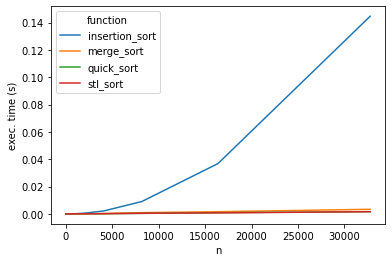

In [10]:
comparison = pd.pivot_table(r, values="ET", columns="function", index="size")
comparison.plot.line(xlabel="n", ylabel="exec. time (s)")

That really drives home the difference between $O(n^2)$ and $O(n \lg n)$.  Here's just the $O(n \lg n)$ algorthims:

That's a little noisy.  Let's look at larger data sizes:

<AxesSubplot:xlabel='n', ylabel='exec. time (s)'>

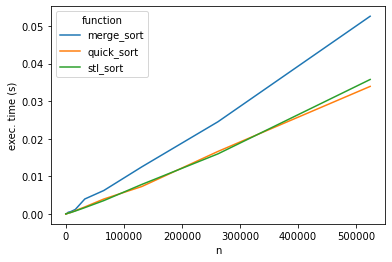

In [12]:
r = run(product([sort], [
                         "merge_sort", 
                         "stl_sort", 
                         "quick_sort"], map_product(size=2**arange(4, 20)))).as_df()
comparison = pd.pivot_table(r, values="ET", columns="function", index="size")
comparison.plot.line(xlabel="n", ylabel="exec. time (s)")

If the numbers look odd, try re-running it.  Performance variation happens!

# The Impact of The Compiler

We can also examine the impact of the compiler on performance.  Let's see how `std::sort()` performance changes with different optimizations.

In [13]:
sorts = build("sorting/sort.cpp", build_parameters=map_product(OPTIMIZE=["-O0", "-O1 -fno-inline", "-O1", "-O3"]))
r = run(product(sorts, ["stl_sort"], map_product(size=[2**20]))).as_df()

,OPTIMIZE,function,size,ET
0,-O0,stl_sort,1048576,0.238104
1,-O1 -fno-inline,stl_sort,1048576,0.173750
2,-O1,stl_sort,1048576,0.077296
3,-O3,stl_sort,1048576,0.080622


<AxesSubplot:xlabel='OPTIMIZE', ylabel='exec. time (s)'>

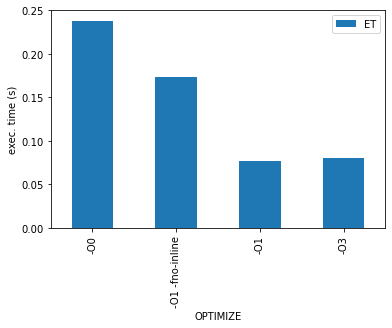

In [14]:
display(r)
comparison = pd.pivot_table(r, values="ET", columns="OPTIMIZE", index="size")
r.plot.bar(y="ET",x="OPTIMIZE", ylabel="exec. time (s)")